# Energy minimisation
*Cyril Rommens, s12495719, masterproject MSc Physics and Astronomy: Computational Physics of Complex Systems*

**Minimise energy by adjusting the probability distribution using Simulated Annealing**


Give an initial matrix:

In [75]:
test_matrix = np.array([[1, 2, 3], [2, 4, 5], [3, 5, 6]])

In [76]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [77]:
# Define shannon entropy function
def shannon_entropy(probabilities):
    # Remove any zero probabilities to avoid log(0) issues
    probabilities = probabilities[probabilities != 0]
    return -np.sum(probabilities * np.log(probabilities))

# Define internal energy function
def energy_function(p, A):
    return np.sum(A * np.outer(p, p))

# Define simulated annealing for energy
def simulated_annealing_energy(desired_function, initial_probabilities, matrix, num_iterations, initial_temperature=1.0, cooling_rate=0.95):
    current_probabilities = initial_probabilities
    current_value = desired_function(current_probabilities, matrix)
    history = [current_value]

    for _ in range(num_iterations):
        temperature = initial_temperature * (cooling_rate ** _)

        # Generate a new set of probabilities
        new_probabilities = generate_probability_list(len(current_probabilities))

        # Evaluate the entropy of the new set of probabilities
        new_value = desired_function(new_probabilities, matrix)

        # Accept the new set of probabilities if its entropy is greater
        if new_value < current_value or np.random.rand() > np.exp((new_value - current_value) / temperature):
            current_probabilities = new_probabilities
            current_value = new_value

        history.append(current_value)

    return history

# Define simulated annealing for entropy
def simulated_annealing_entropy(initial_probabilities, num_iterations, initial_temperature=1.0, cooling_rate=0.95):
    current_probabilities = initial_probabilities
    current_entropy = shannon_entropy(current_probabilities)
    entropy_history = [current_entropy]

    for _ in range(num_iterations):
        temperature = initial_temperature * (cooling_rate ** _)

        # Generate a new set of probabilities
        new_probabilities = generate_probability_list(len(current_probabilities))

        # Evaluate the entropy of the new set of probabilities
        new_entropy = shannon_entropy(new_probabilities)

        # Accept the new set of probabilities if its entropy is greater
        if new_entropy > current_entropy or np.random.rand() < np.exp((new_entropy - current_entropy) / temperature):
            current_probabilities = new_probabilities
            current_entropy = new_entropy

        entropy_history.append(current_entropy)

    return entropy_history

# Define random probability generator
def generate_probability_list(size):
    # Generate a list of random numbers
    random_numbers = np.random.rand(size)

    # Normalize the list to make it a probability distribution
    probabilities = random_numbers / np.sum(random_numbers)

    return probabilities

In [84]:
# Example for generating energy and entropy data from a given matrix
list_size = len(test_matrix)
num_runs = 100
num_iterations_energy = 10000
num_iterations_entropy = 1000
energy_history = []
entropy_history = []

# Run multiple times
for _ in range(num_runs):
    initial_probabilities = generate_probability_list(list_size)

    # Minimum internal energy with simulated annealing
    min_energy = simulated_annealing_energy(energy_function, initial_probabilities, test_matrix, num_iterations_energy)
    energy_history.append(min_energy)

    # Maximum shannon entropy with simulated annealing
    max_entropy = simulated_annealing_entropy(initial_probabilities, num_iterations_entropy)
    entropy_history.append(max_entropy)

# Generate averaged list of entropy_histories
entropy_history = np.array(entropy_history)
entropy_history_averaged = np.mean(entropy_history, axis=0)

# Generate averaged list of energies_optimization_SA
energy_history = np.array(energy_history)
energy_history_averaged = np.mean(energy_history, axis=0)

C:\Users\cyril\AppData\Local\Temp\ipykernel_12600\2124815570.py:27: RuntimeWarning: overflow encountered in exp
  if new_value < current_value or np.random.rand() > np.exp((new_value - current_value) / temperature):


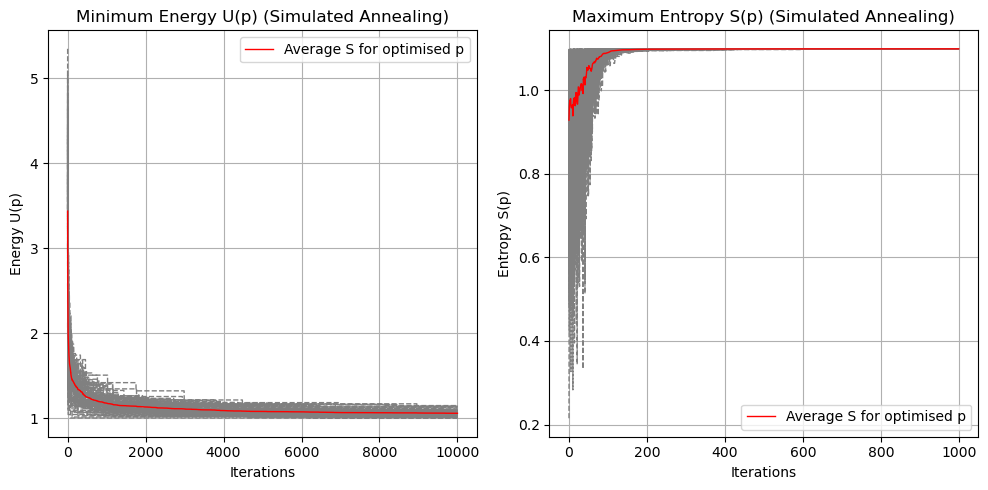

In [85]:
# Plotting the optimisation side by side
plt.figure(figsize=(10, 5))

# Plot the energy/entropy evolution against the number of Simulated Annealing iterations

plt.subplot(1, 2, 1)
for i in range(0, len(energy_history)):
    plt.plot(energy_history[i], color='grey', linestyle='--', linewidth=1)
plt.plot(energy_history_averaged, color='red', linestyle='-', linewidth=1, label = 'Average S for optimised p')
plt.title('Minimum Energy U(p) (Simulated Annealing)')
plt.xlabel('Iterations')
plt.ylabel('Energy U(p)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for i in range(0, len(entropy_history)):
    plt.plot(entropy_history[i], color='grey', linestyle='--', linewidth=1)
plt.plot(entropy_history_averaged, color='red', linestyle='-', linewidth=1, label = 'Average S for optimised p')
plt.title('Maximum Entropy S(p) (Simulated Annealing)')
plt.xlabel('Iterations')
plt.ylabel('Entropy S(p)')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# Now try for a more realistic size

From the plots above it is shown that the minimum energy and maximum entropy are optimised using the simulated annealing technique. From this, we assume that we can use the simulated annealing method from here on. Now try this method for a large dataset of a size close to the real data.

In [92]:
def generate_symmetric_binary_matrix(n):
    # Generate a random binary matrix
    random_matrix = np.random.randint(2, size=(n, n))

    # Make the matrix symmetric by taking the upper triangular part and setting it equal to its transpose
    symmetric_matrix = np.triu(random_matrix, 1) + np.triu(random_matrix, 1).T + np.eye(n)

    return symmetric_matrix

test_matrix = generate_symmetric_binary_matrix(100)

In [97]:
# Example for generating energy and entropy data from a given matrix
list_size = len(test_matrix)
num_iterations_energy = 10000
num_iterations_entropy = 10000
initial_probabilities = generate_probability_list(list_size)

# Minimum internal energy with simulated annealing
min_energy = simulated_annealing_energy(energy_function, initial_probabilities, test_matrix, num_iterations_energy)

# Maximum shannon entropy with simulated annealing
max_entropy = simulated_annealing_entropy(initial_probabilities, num_iterations_entropy)

C:\Users\cyril\AppData\Local\Temp\ipykernel_12600\2124815570.py:27: RuntimeWarning: overflow encountered in exp
  if new_value < current_value or np.random.rand() > np.exp((new_value - current_value) / temperature):


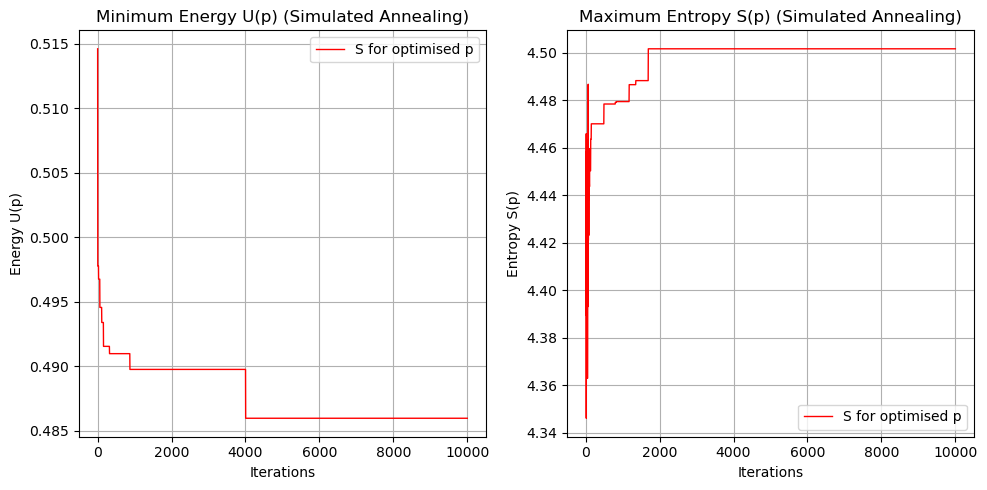

In [98]:
# Plotting the optimisation side by side
plt.figure(figsize=(10, 5))

# Plot the energy/entropy evolution against the number of Simulated Annealing iterations

plt.subplot(1, 2, 1)
plt.plot(min_energy, color='red', linestyle='-', linewidth=1, label = 'S for optimised p')
plt.title('Minimum Energy U(p) (Simulated Annealing)')
plt.xlabel('Iterations')
plt.ylabel('Energy U(p)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(max_entropy, color='red', linestyle='-', linewidth=1, label = 'S for optimised p')
plt.title('Maximum Entropy S(p) (Simulated Annealing)')
plt.xlabel('Iterations')
plt.ylabel('Entropy S(p)')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# Continue with free energy exploration
To get the free energy from these functionals we need to implement $F(p) = U(p) - \Beta S(p)$, where $F(p)$ is the Helmholtz free energy, $U(p)$ the minimum internal energy, $S(p)$ the maximum Shannon entropy and $\Beta = \frac{1}{kT}$ the temperature relation. We want to compare the dynamics of the functionals, while keeping the temperature the same, so we can set $\Beta$ fixed at some constant. 

In [ ]:
# Define functions
def free_energy(matrix, beta):
    # Set initial values
    list_size = len(matrix)
    num_iterations_energy = 10000
    num_iterations_entropy = 10000
    initial_probabilities = generate_probability_list(list_size)

    # Minimum internal energy with simulated annealing
    min_energy = simulated_annealing_energy(energy_function, initial_probabilities, matrix, num_iterations_energy)

    # Maximum shannon entropy with simulated annealing
    max_entropy = simulated_annealing_entropy(initial_probabilities, num_iterations_entropy)
    
    return energy-beta*entropy

In [ ]:
# Generate a list of data, representing sliced time series for one subject or averaged time series for multiple subjects
matrix_size = 100
matrix_amount = 10
test_data = []

for _ in range(matrix_amount):
    test_matrix = generate_symmetric_binary_matrix(matrix_size)
    test_data.append(test_matrix)

In [ ]:
# Compute free energy vs time/subjects
